In [ ]:
!pip uninstall kaggle
!pip install kaggle==1.5.10

Uninstalling kaggle-1.5.10:
  Would remove:
    /usr/local/bin/kaggle
    /usr/local/lib/python3.7/dist-packages/kaggle-1.5.10.dist-info/*
    /usr/local/lib/python3.7/dist-packages/kaggle/*
Proceed (y/n)? y
  Successfully uninstalled kaggle-1.5.10
     |████████████████████████████████| 61kB 8.1MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp37-none-any.whl size=73269 sha256=1db029b89c2d7fa271c4ad71c5dcf2668ad32a6d44872ac23c635f03e63c1389
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
Successfully built kaggle


In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yshendye","key":"e03f8534fb5ea786f25de6e0778e168c"}'}

In [ ]:
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c cassava-leaf-disease-classification
!unzip \*zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_images/3954399974.jpg  
  inflating: train_images/3954487465.jpg  
  inflating: train_images/3954910918.jpg  
  inflating: train_images/3955391972.jpg  
  inflating: train_images/3955442838.jpg  
  inflating: train_images/3955739563.jpg  
  inflating: train_images/3955931830.jpg  
  inflating: train_images/3955972139.jpg  
  inflating: train_images/3956075690.jpg  
  inflating: train_images/3956077728.jpg  
  inflating: train_images/3956155774.jpg  
  inflating: train_images/3956271103.jpg  
  inflating: train_images/3956372146.jpg  
  inflating: train_images/3956407201.jpg  
  inflating: train_images/3956550570.jpg  
  inflating: train_images/3956605397.jpg  
  inflating: train_images/3956778160.jpg  
  inflating: train_images/3957562076.jpg  
  inflating: train_images/3957612771.jpg  
  inflating: train_images/3957807023.jpg  
  inflating: train_images/3957819631.jpg  
  inflating: train_images/395820132.jpg  
  in

In [ ]:
#defining path labels

TRAIN_CSV = 'train.csv'
TRAIN_IMAGE_PATH = '/content/train_images/'
LABELS_JSON = 'label_num_to_disease_map.json'
IMG_SIZE = 224

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import shutil
import cv2

import pickle
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
for i in range(0, 5):
    os.mkdir(str(i))

In [ ]:
#loading the csv file now
train_csv = pd.read_csv('train.csv')

In [ ]:
for index, row in train_csv.iterrows():    
      try:
        shutil.move(TRAIN_IMAGE_PATH + row['image_id'], '/content/' + str(row['label']) + '/')
      except Exception as e:
        pass

In [ ]:
im0 = plt.imread('/content/0/1000015157.jpg')
im1 = plt.imread('/content/1/100042118.jpg')
im2 = plt.imread('/content/2/1000910826.jpg')
im3 = plt.imread('/content/3/1000837476.jpg')
im4 = plt.imread('/content/4/1001723730.jpg')

images = [im0, im1, im2, im3, im4]

Text(0.5, 1.0, 'type 4')

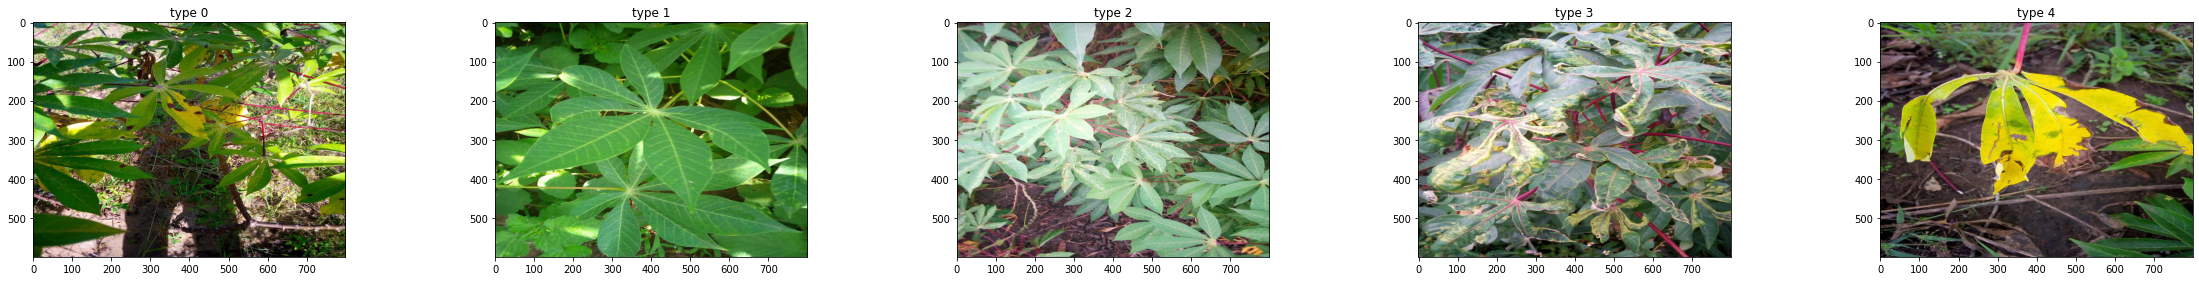

In [ ]:
plt.figure(figsize=(40, 25))
plt.subplot(5, 5, 1)
plt.imshow(im0)
plt.title('type 0')

plt.subplot(5, 5, 2)
plt.imshow(im1)
plt.title('type 1')

plt.subplot(5, 5, 3)
plt.imshow(im2)
plt.title('type 2')

plt.subplot(5, 5, 4)
plt.imshow(im3)
plt.title('type 3')

plt.subplot(5, 5, 5)
plt.imshow(im4)
plt.title('type 4')

In [ ]:
#copying the subfolfers in 1 directory and call it TrainData
os.mkdir('TrainData')

In [ ]:
shutil.move('/content/0/', '/content/TrainData')
shutil.move('/content/1/', '/content/TrainData')
shutil.move('/content/2/', '/content/TrainData')
shutil.move('/content/3/', '/content/TrainData')
shutil.move('/content/4/', '/content/TrainData')

'/content/TrainData/4'

In [ ]:
BATCH_SIZE = 20
EPOCHS = 200
LEARNING_RATE = 0.001

In [ ]:
#creating training data generator
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(        
    validation_split = 0.3,    
    fill_mode="nearest"
)

#creating validation data generator
val_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split = 0.3    
)

In [ ]:
custom_aug = tf.keras.Sequential()
custom_aug.add(tf.keras.layers.experimental.preprocessing.CenterCrop(IMG_SIZE, IMG_SIZE))
custom_aug.add(tf.keras.layers.experimental.preprocessing.RandomZoom(0.5))

In [ ]:
train_data_crop1 = train_gen.flow_from_directory(
        'TrainData',
        target_size=(IMG_SIZE, IMG_SIZE),          
        class_mode='categorical',
        subset = 'training',        
        shuffle = True
)

val_data_crop1 = train_gen.flow_from_directory(
        'TrainData',
        target_size=(IMG_SIZE, IMG_SIZE),          
        class_mode='categorical',
        subset = 'validation',
        shuffle = False
)
'''
train_data_crop2 = train_gen.flow_from_directory(
        'Cropped2',
        target_size=(IMG_SIZE, IMG_SIZE),          
        class_mode='categorical',
        subset = 'training',        
        shuffle = True
)

val_data_crop2 = train_gen.flow_from_directory(
        'Cropped2',
        target_size=(IMG_SIZE, IMG_SIZE),          
        class_mode='categorical',
        subset = 'validation',
        shuffle = True
)

train_data_crop3 = train_gen.flow_from_directory(
        'Cropped3',
        target_size=(IMG_SIZE, IMG_SIZE),          
        class_mode='categorical',
        subset = 'training',        
        shuffle = True
)

val_data_crop3 = train_gen.flow_from_directory(
        'Cropped3',
        target_size=(IMG_SIZE, IMG_SIZE),          
        class_mode='categorical',
        subset = 'validation',
        shuffle = True
)

train_data_crop4 = train_gen.flow_from_directory(
        'Cropped4',
        target_size=(IMG_SIZE, IMG_SIZE),          
        class_mode='categorical',
        subset = 'training',        
        shuffle = True
)

val_data_crop4 = train_gen.flow_from_directory(
        'Cropped4',
        target_size=(IMG_SIZE, IMG_SIZE),          
        class_mode='categorical',
        subset = 'validation',
        shuffle = True
)'''

Found 14980 images belonging to 5 classes.
Found 6417 images belonging to 5 classes.


"\ntrain_data_crop2 = train_gen.flow_from_directory(\n        'Cropped2',\n        target_size=(IMG_SIZE, IMG_SIZE),          \n        class_mode='categorical',\n        subset = 'training',        \n        shuffle = True\n)\n\nval_data_crop2 = train_gen.flow_from_directory(\n        'Cropped2',\n        target_size=(IMG_SIZE, IMG_SIZE),          \n        class_mode='categorical',\n        subset = 'validation',\n        shuffle = True\n)\n\ntrain_data_crop3 = train_gen.flow_from_directory(\n        'Cropped3',\n        target_size=(IMG_SIZE, IMG_SIZE),          \n        class_mode='categorical',\n        subset = 'training',        \n        shuffle = True\n)\n\nval_data_crop3 = train_gen.flow_from_directory(\n        'Cropped3',\n        target_size=(IMG_SIZE, IMG_SIZE),          \n        class_mode='categorical',\n        subset = 'validation',\n        shuffle = True\n)\n\ntrain_data_crop4 = train_gen.flow_from_directory(\n        'Cropped4',\n        target_size=(IMG_SIZE, IM

In [ ]:
base = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet',input_shape=(IMG_SIZE,IMG_SIZE,3))

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense
model = tf.keras.Sequential()
#model.add(augmentation_layer)
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation("softmax"))

In [ ]:
#my own custom model
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.BatchNormalization(input_shape=(IMG_SIZE, IMG_SIZE, 3)))
#model2.add(base)
#first convolutional layer
model2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#second convolutional layer
model2.add(tf.keras.layers.Conv2D(filters = 64, kernel_size=(3, 3), padding = 'same', activation='relu'))
#model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#third convolutional layer
model2.add(tf.keras.layers.Conv2D(filters = 128, kernel_size=(3, 3), padding = 'same', activation='relu'))
model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#converting the 2d layer into single dimensional one using flatten
model2.add(tf.keras.layers.Flatten())

#creating deep neural network
model2.add(tf.keras.layers.Dense(100, activation='relu'))
#model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dropout(0.6))

model2.add(tf.keras.layers.Dense(200, activation='relu'))
#model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Dense(5, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_100 (Bat (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 56, 56, 128)       73856     
_________________________________________________________________
dropout_4 (Dropout)          (None, 56, 56, 128)      

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss = 'categorical_crossentropy', 
    metrics=["acc"]
)

In [ ]:
#defining a scheduler to chnage the learning rate accordingly
def scheduler(epoch, lr):
    if epoch >2 and epoch%2==0:
        lr = lr / 1.67
        return lr
    else:
        return lr

lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
callback0 = tf.keras.callbacks.ModelCheckpoint("./CasavaLeafDiseaseModel.h5", monitor='val_acc',save_best_only=True)

In [ ]:
history = model.fit(x=train_data_crop1, epochs=15, callbacks=[lr_callback])

Epoch 1/15
469/469 [==============================] - 126s 270ms/step - loss: 0.8800 - acc: 0.6698
Epoch 2/15
469/469 [==============================] - 126s 269ms/step - loss: 0.9486 - acc: 0.6573
Epoch 3/15
469/469 [==============================] - 126s 269ms/step - loss: 0.8487 - acc: 0.6807
Epoch 4/15
469/469 [==============================] - 126s 268ms/step - loss: 0.7815 - acc: 0.7076
Epoch 5/15
469/469 [==============================] - 126s 268ms/step - loss: 0.6770 - acc: 0.7469
Epoch 6/15
469/469 [==============================] - 125s 267ms/step - loss: 0.6402 - acc: 0.7572
Epoch 7/15
469/469 [==============================] - 125s 267ms/step - loss: 0.6276 - acc: 0.7667
Epoch 8/15
469/469 [==============================] - 125s 267ms/step - loss: 0.5213 - acc: 0.8048
Epoch 9/15
469/469 [==============================] - 124s 265ms/step - loss: 0.4424 - acc: 0.8365
Epoch 10/15
469/469 [==============================] - 125s 266ms/step - loss: 0.3832 - acc: 0.8617
Epoch 11/

In [ ]:
#defining a scheduler to chnage the learning rate accordingly
def scheduler(epoch, lr):
    if epoch >2 and epoch%2==0:
        lr = lr / 1.57
        return lr
    else:
        return lr

lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
callback0 = tf.keras.callbacks.ModelCheckpoint("./CasavaLeafDiseaseModel.h5", monitor='val_acc',save_best_only=True)

train_gen2 = tf.keras.preprocessing.image.ImageDataGenerator(     
    fill_mode="nearest"
)

train_data_crop2 = train_gen2.flow_from_directory(
        'TrainData',
        target_size=(IMG_SIZE, IMG_SIZE),          
        class_mode='categorical',
        subset = 'training',        
        shuffle = True
)


history2 = model.fit(x=train_data_crop2, epochs=15, callbacks=[lr_callback, callback0], validation_data=val_data_crop1)

Found 21397 images belonging to 5 classes.
Epoch 1/15
669/669 [==============================] - 230s 344ms/step - loss: 0.3666 - acc: 0.8898 - val_loss: 0.7253 - val_acc: 0.7642
Epoch 2/15
669/669 [==============================] - 229s 342ms/step - loss: 0.3346 - acc: 0.8978 - val_loss: 0.6549 - val_acc: 0.7842
Epoch 3/15
669/669 [==============================] - 228s 341ms/step - loss: 0.3177 - acc: 0.8999 - val_loss: 0.5231 - val_acc: 0.8155
Epoch 4/15
669/669 [==============================] - 230s 344ms/step - loss: 0.2822 - acc: 0.9106 - val_loss: 0.4260 - val_acc: 0.8481
Epoch 5/15
669/669 [==============================] - 231s 345ms/step - loss: 0.2612 - acc: 0.9169 - val_loss: 0.3694 - val_acc: 0.8721
Epoch 6/15
669/669 [==============================] - 230s 344ms/step - loss: 0.2478 - acc: 0.9182 - val_loss: 0.3262 - val_acc: 0.8855
Epoch 7/15
669/669 [==============================] - 229s 343ms/step - loss: 0.2268 - acc: 0.9278 - val_loss: 0.3175 - val_acc: 0.8892
Epoch

In [ ]:
!cp /content/CasavaLeafDiseaseModel.h5 /content/drive/MyDrive